## Урок 1. Алгоритм линейной регрессии. 
## Градиентный спуск

In [112]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

### Линейная регрессия

In [113]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) # стаж
X.shape

(2, 10)

$$\vec{y}=X\vec{w}+\vec{\epsilon},$$


$$\text{где }\vec{y} = \begin{pmatrix}
y_{1}\\ 
\vdots\\ 
y_{n}
\end{pmatrix}, 
X = \begin{pmatrix}
1 & x_{1}\\ 
\vdots & \vdots\\ 
1 & x_{n}
\end{pmatrix},
\vec{w} = \begin{pmatrix}
w_{0}\\ 
w_{1}
\end{pmatrix}
$$

In [114]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

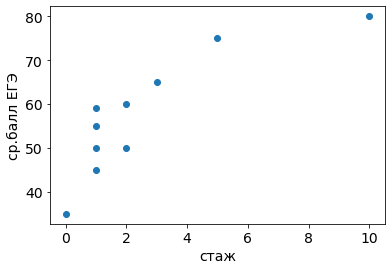

In [115]:
plt.scatter(X[1], y)
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

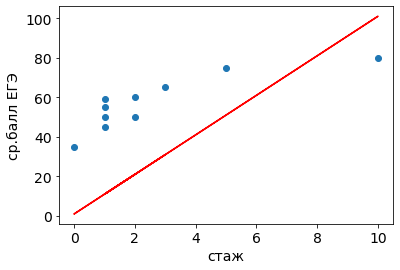

In [116]:
# y = m * x + b
m = 10
b = 1
plt.scatter(X[1], y);
plt.plot(X[1],  m * X[1] + b, color='red')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

In [117]:
y_pred1 = 45 + 4.5 * X[1] 
y_pred2 = 40 + 6 * X[1]

In [118]:
y_pred1

array([49.5, 49.5, 54. , 49.5, 58.5, 45. , 67.5, 90. , 49.5, 54. ])

In [119]:
y_pred2

array([ 46,  46,  52,  46,  58,  40,  70, 100,  46,  52])

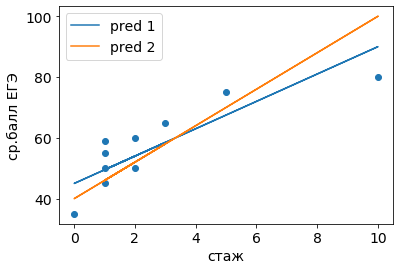

In [120]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='pred 1')
plt.plot(X[1], y_pred2, label='pred 2')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ')
plt.legend();

In [121]:
w = [35, 5]
print(w @ X)
print(np.dot(w, X))
print(np.dot(X.T, w))
print(w[0] * X[0] + w[1] * X[1])
print(np.sum(w * X.T, axis=1))

[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]


In [122]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)
err1, err2

(0.7, 1.8)

In [123]:
# mae - mean absolute error
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(6.4, 7.4)

In [124]:
# mse - mean squared error
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(49.15, 83.4)

### Метод наименьших квадратов

Нормальное уравнение линейной регрессии
$$\vec{w} = (X^{T}X)^{-1}X^{T}\vec{y}$$

In [125]:
w = np.linalg.inv(X @ X.T) @ X @ y
#w = np.dot(np.linalg.inv(np.dot(X, X.T)),X)
w

array([47.23214286,  3.91071429])

In [126]:
w1 = np.sum((y - np.mean(y)) * (X[1] - X[1].mean())) / np.sum((X[1] - X[1].mean()) ** 2)
w0 = np.mean(y) - w1 * X[1].mean()
w0, w1

(47.23214285714286, 3.910714285714285)

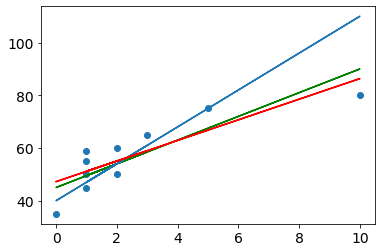

In [127]:
plt.scatter(X[1], y)
plt.plot(X[1], 45 + X[1] * 4.5, color='g')
plt.plot(X[1], 40 + X[1] * 7)
plt.plot(X[1], w[0] + w[1] * X[1], color='red');

In [128]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [129]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(6.4, 49.15)

In [130]:
y_pred3 = w[0] + w[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [131]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(6.182142857142856, 45.937499999999986)

### Градиентный спуск

$$L(w)=\frac{1}{n}\sum^{n}_{i=1}\big({y_{pred}}_i-y_{i}\big)^{2}=\frac{1}{n}\sum^{n}_{i=1}\big((w_0\cdot x_{i0}+w_1\cdot x_{i1})-y_{i}\big)^{2}\rightarrow \underset{w}{\text{min}}$$
$$w_j\leftarrow w_j-\alpha\frac{\partial}{\partial w_j}L(w)$$
$$\frac{\partial L(w)}{\partial w_j}=\frac{1}{n} 2\sum^{n}_{i=1}x_{ij}\Big(\sum^{m}_{j=0}(w_jx_{ij})-y_i\Big)$$
$$\vec{w}=\vec{w}-\alpha \frac{2}{n}X^T(X\vec{w}-\vec{y}) $$


In [132]:
n = 10
alpha = 1e-3
w = np.array([1, 0.5])
grad = 1/n * 2 * np.sum(X * (np.sum(w * X.T, axis=1) - y), axis=1)
grad = 1/n * 2 * np.dot(X, (np.dot(w, X) - y))
w, w - alpha * grad

(array([1. , 0.5]), array([1.1102, 0.84  ]))

### Домашние задания

1. Подберите скорость обучения (alpha) и количество итераций:

In [145]:
n = X.shape[1]
alpha = 1e-2
w = np.array([1, 0.5])
errors = []
for i in range(1200):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    errors.append(err)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 400 == 0:
        print(i, w, err)

0 [2.102 3.9  ] 3173.15
400 [46.56511152  4.03388672] 46.181755648107604
800 [47.2219474   3.91259695] 45.93755706443538


Text(0, 0.5, 'MSE')

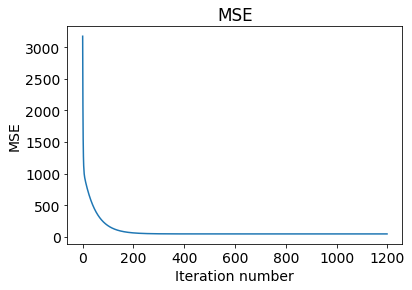

In [134]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [163]:
(alpha * (1/n * 2) * X.T)

array([[0.002, 0.002],
       [0.002, 0.002],
       [0.002, 0.004],
       [0.002, 0.002],
       [0.002, 0.006],
       [0.002, 0.   ],
       [0.002, 0.01 ],
       [0.002, 0.02 ],
       [0.002, 0.002],
       [0.002, 0.004]])

In [188]:
w = np.array([1, 0.5])
y_pred = np.dot(w, X)
y_pred

array([1.5, 1.5, 2. , 1.5, 2.5, 1. , 3.5, 6. , 1.5, 2. ])

##### 2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [200]:
w = np.array([1, 0.5])
errors = []
for i in range(1200):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    errors.append(err)
    w[0] -= (alpha * (1/n * 2 * np.sum(X[0] * (y_pred - y))))
    w[1] -= (alpha * (1/n * 2 * np.sum(X[1] * (y_pred - y))))
    if i % 100 == 0:
        print(i, w, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219864
1100 [47.23169965  3.91079613] 45.93750010783411


Text(0, 0.5, 'MSE')

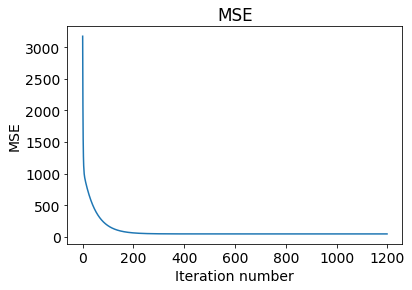

In [201]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

##### 3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога

In [211]:
n = X.shape[1]
alpha = 1e-2
w = np.array([1, 0.5])
errors = []

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_err = 47
weight_err = np.inf

while weight_err > min_err:
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    errors.append(err)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
        weight_err = err
        print(w, err)
    

[2.102 0.5  ] 3173.15
[2.102 3.9  ] 3173.15
[3.00516 3.9    ] 2085.1833639999995
[3.00516  6.249896] 2085.1833639999995
[3.76806221 6.249896  ] 1543.8856327929857
[3.76806221 7.86665805] 1543.8856327929857
[4.43163475 7.86665805] 1269.450790627765
[4.43163475 8.97165466] 1269.450790627765
[5.02447601 8.97165466] 1125.3962478602255
[5.02447601 9.71948649] 1125.3962478602255
[5.56657319 9.71948649] 1045.1468702184588
[ 5.56657319 10.21812369] 1045.1468702184588
[ 6.07189929 10.21812369] 996.2256404018397
[ 6.07189929 10.54296976] 996.2256404018397
[ 6.55022688 10.54296976] 962.7873115334002
[ 6.55022688 10.74668383] 962.7873115334002
[ 7.00839478 10.74668383] 937.0990290056232
[ 7.00839478 10.86604035] 937.0990290056232
[ 7.45119279 10.86604035] 915.3849211067269
[ 7.45119279 10.92672004] 915.3849211067269
[ 7.88197949 10.92672004] 895.7992568721307
[ 7.88197949 10.94665576] 895.7992568721307
[ 8.3031138  10.94665576] 877.437832837458
[ 8.3031138  10.93836935] 877.437832837458
[ 8.716256

[39.03636904  5.44002812] 82.8125034145725
[39.03636904  5.42412662] 82.8125034145725
[39.12158708  5.42412662] 82.04965214509885
[39.12158708  5.40839045] 82.04965214509885
[39.20591903  5.40839045] 81.30258235373915
[39.20591903  5.39281791] 81.30258235373915
[39.28937412  5.39281791] 80.5709675613206
[39.28937412  5.37740729] 80.5709675613206
[39.37196146  5.37740729] 79.85448804270484
[39.37196146  5.36215691] 79.85448804270484
[39.45369007  5.36215691] 79.15283068706445
[39.45369007  5.3470651 ] 79.15283068706445
[39.53456888  5.3470651 ] 78.46568886104909
[39.53456888  5.3321302 ] 78.46568886104909
[39.61460673  5.3321302 ] 77.79276227478272
[39.61460673  5.3173506 ] 77.79276227478272
[39.69381237  5.3173506 ] 77.13375685063328
[39.69381237  5.30272468] 77.13375685063328
[39.77219444  5.30272468] 76.48838459469674
[39.77219444  5.28825083] 76.48838459469674
[39.8497615   5.28825083] 75.85636347094018
[39.8497615   5.27392748] 75.85636347094018
[39.92652205  5.27392748] 75.2374172

[44.71653152  4.38012197] 49.41157528976428
[44.71653152  4.37524116] 49.41157528976428
[44.74268835  4.37524116] 49.33970539146898
[44.74268835  4.3704111 ] 49.33970539146898
[44.76857321  4.3704111 ] 49.26932230098591
[44.76857321  4.36563127] 49.26932230098591
[44.79418892  4.36563127] 49.20039525999304
[44.79418892  4.36090113] 49.20039525999304
[44.81953828  4.36090113] 49.132894146480965
[44.81953828  4.35622018] 49.132894146480965
[44.84462406  4.35622018] 49.06678946158898
[44.84462406  4.35158789] 49.06678946158898
[44.86944901  4.35158789] 49.00205231671375
[44.86944901  4.34700378] 49.00205231671375
[44.89401584  4.34700378] 48.938654420884696
[44.89401584  4.34246733] 48.938654420884696
[44.91832722  4.34246733] 48.876568068400324
[44.91832722  4.33797804] 48.876568068400324
[44.94238582  4.33797804] 48.815766126720696
[44.94238582  4.33353544] 48.815766126720696
[44.96619426  4.33353544] 48.75622202460997
[44.96619426  4.32913903] 48.75622202460997
[44.98975514  4.32913903

Text(0, 0.5, 'MSE')

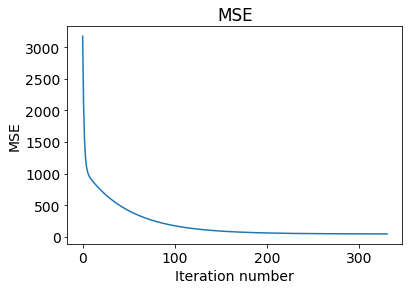

In [212]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')